# Workshop 02 - Histograms and filters
_Author: Nicola Romanò - [nicola.romano@ed.ac.uk](mailto:nicola.romano@ed.ac.uk)_

## Introduction

This workshop will be based on what you have learned in lectures 3 and 4, related to image histograms, filters, and edge detection.

In this practical we are going to apply some of that knowledge to the processing of biomedical images.

## Learning objectives

At the end of this workshop you should be able to:
- Plot and manipulate histograms of images
- Apply filters to images

## Histogram manipulation

In Lecture 3 you learned about histograms and their use in image processing.

Let's start with a few simple examples. Load the images `xray.png`, `mri.png` and `mouse.png` and plot them, alongside their histograms.

Make sure you look at the shape of the image before plotting the histogram and think about what is the best way to plot the histogram.

<details>
    <summary style="cursor: pointer;">Click here to reveal a hint.</summary>
    When calling the <code>hist</code> function remember to flatten the image using <code>.ravel()</code> before plotting!</br>
    <code>ravel()</code> will convert something like <code>[[1, 2], [3, 4]]</code> into <code>[1,2,3,4]</code>, which is what <code>hist</code> expects.<br/><br/>
    Example usage:<code>img.ravel()</code>
</details>

Image credits:
- Hand X-Rays: Rahim Packir Saibo, [CC-BY-2.0](https://creativecommons.org/licenses/by/2.0/)
- MRI: Bryan Kiechle, [CC-BY-NC-2.0](https://creativecommons.org/licenses/by-nc/2.0/)
- Mouse: Global Panorama, [CC-BY-SA-20](https://creativecommons.org/licenses/by-sa/2.0/)

(800, 592)
(797, 800, 3)
(533, 800, 3)


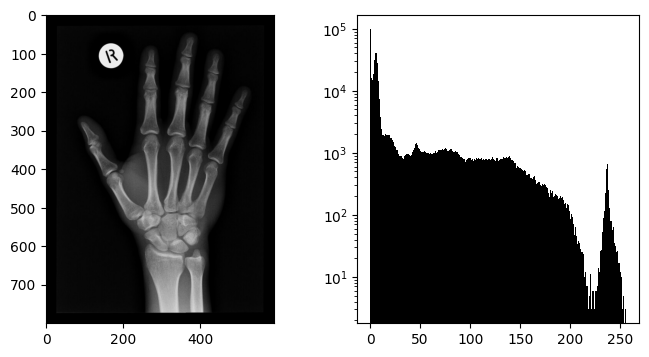

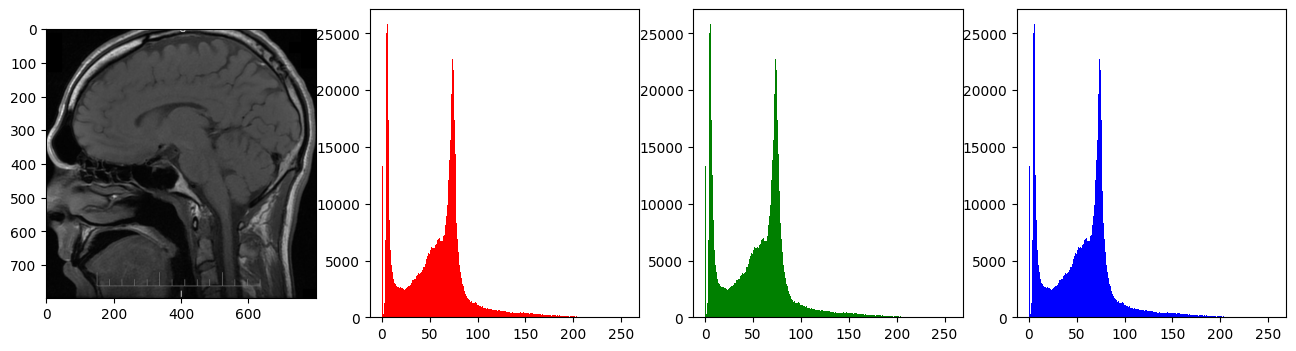

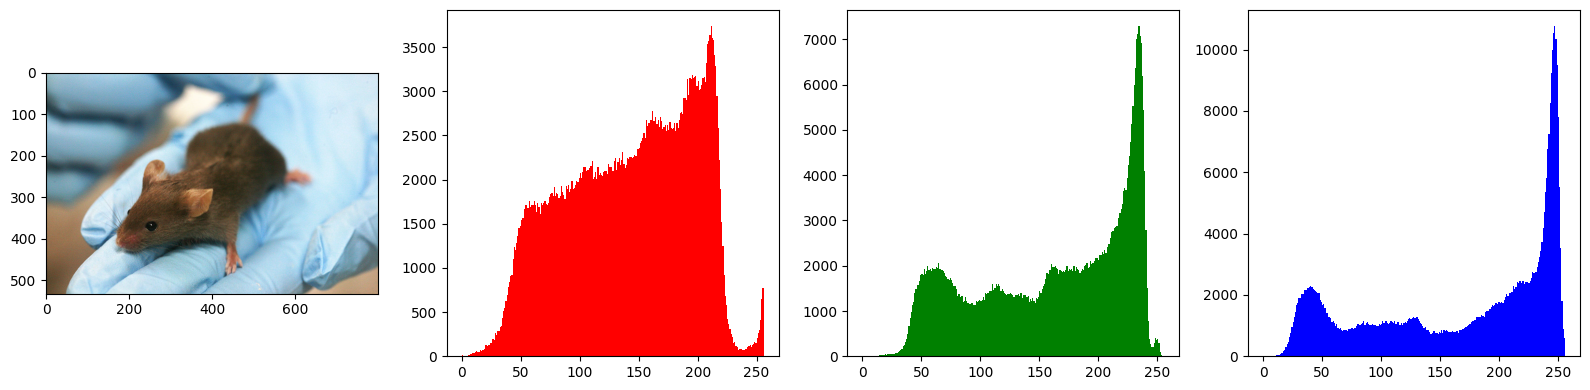

In [2]:
from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np

xray = imread("xray.png")
mri = imread("mri.png")
mouse = imread("mouse.png")

print(xray.shape)
print(mri.shape)
print(mouse.shape)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
# This probably is easier to understand in log scale
ax[0].imshow(xray, cmap="gray")
ax[1].hist(xray.flat, bins=256, range=(0, 256), color='black', log=True)
plt.show()

# The MRI and mouse images are RGB, so we can plot 3 different histograms for the 3 channels
fig, ax = plt.subplots(1, 4, figsize=(16, 4))

ax[0].imshow(mri, cmap="gray")
ax[1].hist(mri[:,:,0].flat, bins=256, range=(0, 256), color='red')
ax[2].hist(mri[:,:,1].flat, bins=256, range=(0, 256), color='green')
ax[3].hist(mri[:,:,2].flat, bins=256, range=(0, 256), color='blue')

fig, ax = plt.subplots(1, 4, figsize=(16, 4))

ax[0].imshow(mouse)
ax[1].hist(mouse[:,:,0].flat, bins=256, range=(0, 256), color='red')
ax[2].hist(mouse[:,:,1].flat, bins=256, range=(0, 256), color='green')
ax[3].hist(mouse[:,:,2].flat, bins=256, range=(0, 256), color='blue')

plt.tight_layout()

### Questions

1. What can you conclude by looking at the histograms regarding their exposure/contrast?
2. Can you explain why there are clear peaks in some of those histograms?
3. Did you notice anything particular when looking at the MRI image and its corresponding histogram?

### Answers

1. The X-Ray image and the mouse image seem to be correctly exposed. The MRI image is underexposed, since the histogram is shifted to the left. The mouse image is slightly overexposed in green and blue, while it is well exposed in red.
2. There are clear peaks around 0 and the top of the image range in the X-Ray and MRI histograms. These correspond to the black background and the bright areas (such as the circle with R written in it on the X-Ray) respsectively.
3. The MRI image is essentially a grayscale image that has been saved as RGB, since the three channels are identical.


When faced with situations like that of the MRI image, where a grayscale image is saved as RGB, there are two options:

1. The simplest thing is to take one of the colour channels.

2. Alternatively you can use the `rgb2gray` in `skimage.color` to convert an RGB image to a grayscale image. If you read the function's [manual page](https://scikit-image.org/docs/dev/api/skimage.color.html#skimage.color.rgb2gray), you will see that it uses the following formula to calculate a perceptively adjusted grayscale image

`Y = 0.2125 R + 0.7154 G + 0.0721 B`

In this case the results will be the same, but if you were to do this, for example with the mouse image you would get different results.

**Now, either take one of the three colour channels or use `rgb2gray`, display the image and its histogram and save it to a file called `MRI_grayscale.png`.**

### Questions

- Do the image and histogram match what you had above?
- *Optional*: try comparing the output of the two methods and see if you can find any differences. Also, you can try using these functions on the mouse image.


### Answers

Yes, they do match, no matter which method you use. The only difference is that `rgb2gray` will convert the image to float.

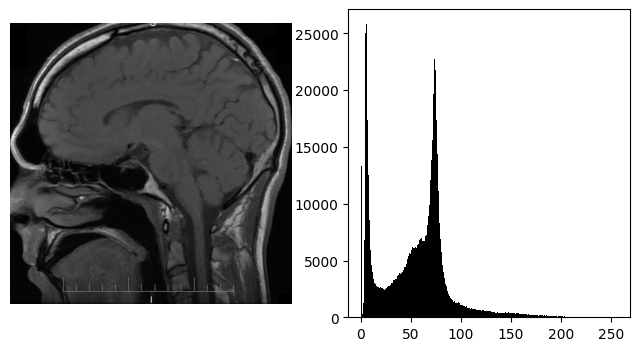

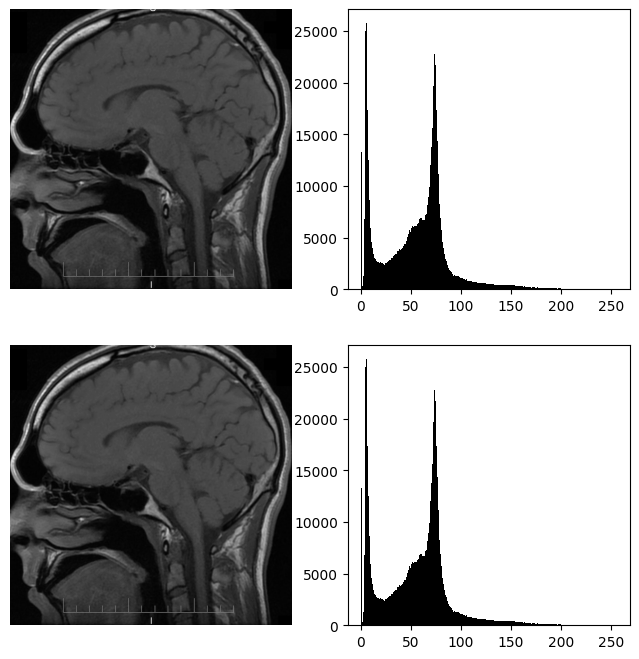

Same image


In [3]:
from skimage.color import rgb2gray
from skimage.io import imsave
from skimage import img_as_ubyte 

# Option 1 - take a single channel
mri_gray = mri[:,:,0] # or [:,:,1] or [:,:,2], it's the same!

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(mri_gray, cmap="gray")
ax[0].axis('off')
ax[1].hist(mri_gray.flat, bins=256, range=(0, 256), color='black')

plt.show()

imsave("MRI_grayscale.png", mri_gray)

# Option 2 - use rgb2gray
mri_gray2 = img_as_ubyte(rgb2gray(mri))

fig, ax = plt.subplots(2, 2, figsize=(8, 8))
ax[0, 0].imshow(mri_gray, cmap="gray")
ax[0, 0].axis('off')
ax[0, 1].hist(mri_gray.flat, bins=256, range=(0, 256), color='black')
ax[1, 0].imshow(mri_gray2, cmap="gray")
ax[1, 0].axis('off')
ax[1, 1].hist(mri_gray2.flat, bins=256, range=(0, 256), color='black')

plt.show()

# Check all is the same
if (mri_gray == mri_gray2).all():
    print("Same image")
else:
    print("Different images")

### Exercise 1

Create a function that, given an image plots its histogram.
The function should have the following form:

`plot_histogram(img, num_bins, show_img, log)`

Where:

- `img` is the image
- `num_bins` is the number of bins in the histogram
- `show_img` is a boolean that, if set to `True`, will display the image next to the histogram.
- `log` is a boolean that, if set to `True`, will plot the histogram in logarithmic scale.

Note that `img` can be either grayscale or RGB. It's up to you to produce an appropriate histogram.

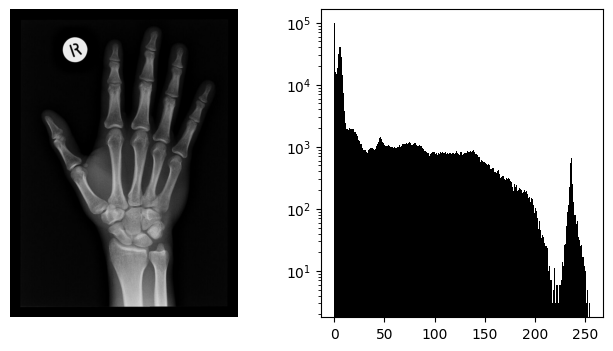

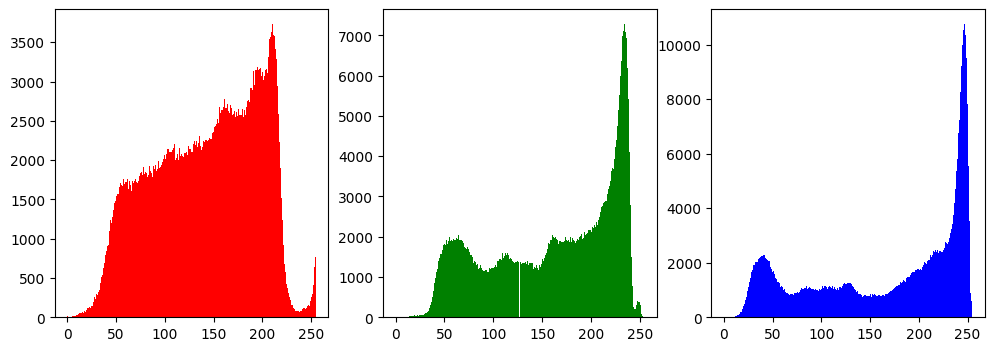

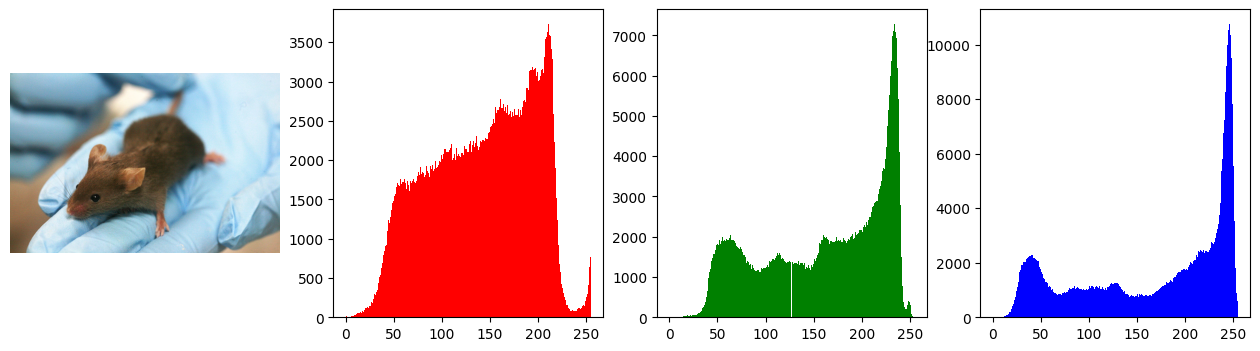

In [4]:
def plot_histogram(img, num_bins, show_img, log):
    """
    Plots a histogram of the given image
    Parameters:
        img: image to be plotted
        num_bins: number of bins in the histogram
        show_img: if True, the image is plotted
        log: if True, the histogram is plotted in log scale
    """

    # First of all check if this is a grayscale or a RGB image
    if len(img.shape) == 2: # grayscale
        if show_img:
            _, ax = plt.subplots(1, 2, figsize=(8, 4))
            ax[0].imshow(img, cmap="gray")
            ax[0].axis('off')
            ax[1].hist(img.flat, bins=num_bins, color='black', log=log)
        else:
            plt.hist(img.flat, bins=num_bins, color='black', log=log)
    elif show_img:
        _, ax = plt.subplots(1, 4, figsize=(16, 4))
        ax[0].imshow(img)
        ax[0].axis('off')
        ax[1].hist(img[:,:,0].flat, bins=num_bins, color='red', log=log)
        ax[2].hist(img[:,:,1].flat, bins=num_bins, color='green', log=log)
        ax[3].hist(img[:,:,2].flat, bins=num_bins, color='blue', log=log)
    else:
        _, ax = plt.subplots(1, 3, figsize=(12, 4))
        ax[0].hist(img[:,:,0].flat, bins=num_bins, color='red', log=log)
        ax[1].hist(img[:,:,1].flat, bins=num_bins, color='green', log=log)
        ax[2].hist(img[:,:,2].flat, bins=num_bins, color='blue', log=log)

    plt.show()

# A few tests
plot_histogram(xray, num_bins=256, show_img=True, log=True) 
plot_histogram(mouse, num_bins=256, show_img=False, log=False)
plot_histogram(mouse, num_bins=256, show_img=True, log=False)

## Histogram manipulation

The MRI image is underexposed, as evidenced by the left-shifted histogram.

### Exercise 2

Use what you learnt in Lecture 3 to either stretch the histogram to the [0, 255] range or to equalize the histogram.

Plot the resulting images, along with their respective histograms and cumulative histograms.
Visually comparing the results side by side should give you a better understanding of these operations.


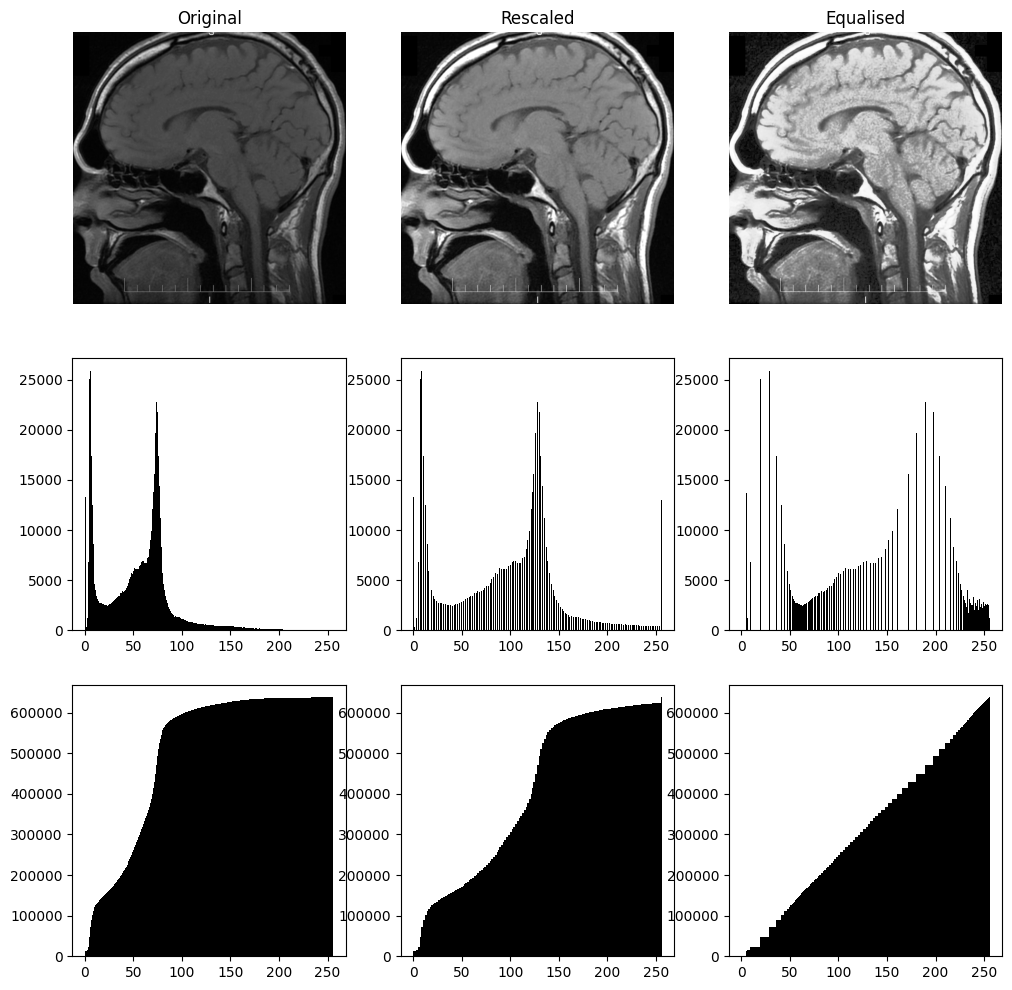

In [5]:
import numpy as np
from skimage.exposure import rescale_intensity, equalize_hist

q2, q98 = np.percentile(mri, (2, 98))
mri_rescaled = rescale_intensity(mri_gray, in_range=(q2, q98), out_range=(0, 255))
mri_equalised = img_as_ubyte(equalize_hist(mri_gray))

fig, ax = plt.subplots(3, 3, figsize=(12, 12))

ax[0, 0].imshow(mri_gray, cmap="gray")
ax[0, 0].set_title("Original")
ax[0, 1].imshow(mri_rescaled, cmap="gray")
ax[0, 1].set_title("Rescaled")
ax[0, 2].imshow(mri_equalised, cmap="gray")
ax[0, 2].set_title("Equalised")

for a in ax[0]:
    a.axis('off')

ax[1, 0].hist(mri_gray.flat, bins=256, range=(0, 256), color='black')
ax[1, 1].hist(mri_rescaled.flat, bins=256, range=(0, 256), color='black')
ax[1, 2].hist(mri_equalised.flat, bins=256, range=(0, 256), color='black')

ax[2, 0].hist(mri_gray.flat, bins=256, range=(0, 256), color='black', cumulative=True)
ax[2, 1].hist(mri_rescaled.flat, bins=256, range=(0, 256), color='black', cumulative=True)
ax[2, 2].hist(mri_equalised.flat, bins=256, range=(0, 256), color='black', cumulative=True)

plt.show()


## Rank filters

We will now try in practice a few of the notions learnt in Lecture 4.
Let's start practicing some of the rank filters such as max, min and median on the xray image.
You can use the functions in [`skimage.filters.rank`](https://scikit-image.org/docs/stable/api/skimage.filters.rank.html) to apply these filters.
Remember that you have to pass a neighborhood footprint to the function with the `selem` parameter. You can import different footprints from [`skimage.morphology`](https://scikit-image.org/docs/stable/api/), such as `disk` or `diamond`.

Notice what happens to the image with the different filters and footprints.

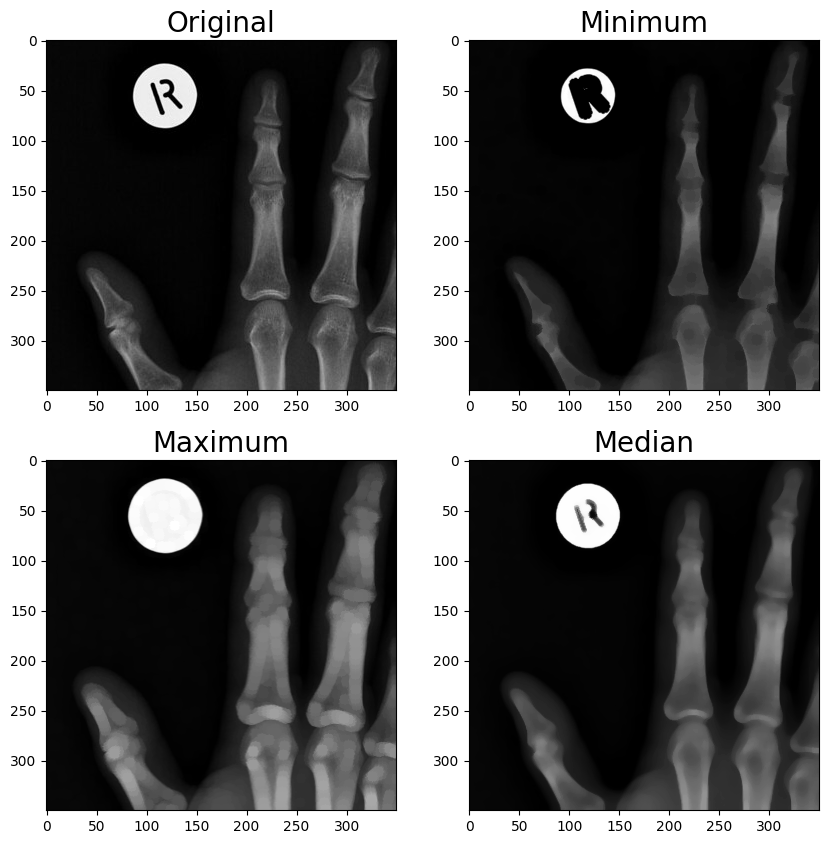

In [9]:
from skimage.filters.rank import minimum, maximum, median, median
from skimage.morphology import disk

xray_crop = xray[50:400, 50:400]

xray_min = minimum(xray_crop, footprint = disk(5))
xray_max = maximum(xray_crop, footprint = disk(5))
xray_med = median(xray_crop, footprint = disk(5))

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].imshow(xray_crop, cmap="gray")
ax[0, 0].set_title("Original", fontsize=20)
ax[0, 1].imshow(xray_min, cmap="gray")
ax[0, 1].set_title("Minimum", fontsize=20)
ax[1, 0].imshow(xray_max, cmap="gray")
ax[1, 0].set_title("Maximum", fontsize=20)
ax[1, 1].imshow(xray_med, cmap="gray")
ax[1, 1].set_title("Median", fontsize=20)

plt.show()


## Convolutional filters

Let's now try some convolutional filters.

As above, practice with the `skimage.filters` function `gaussian`. Try different values of sigma and see how that affects the image.

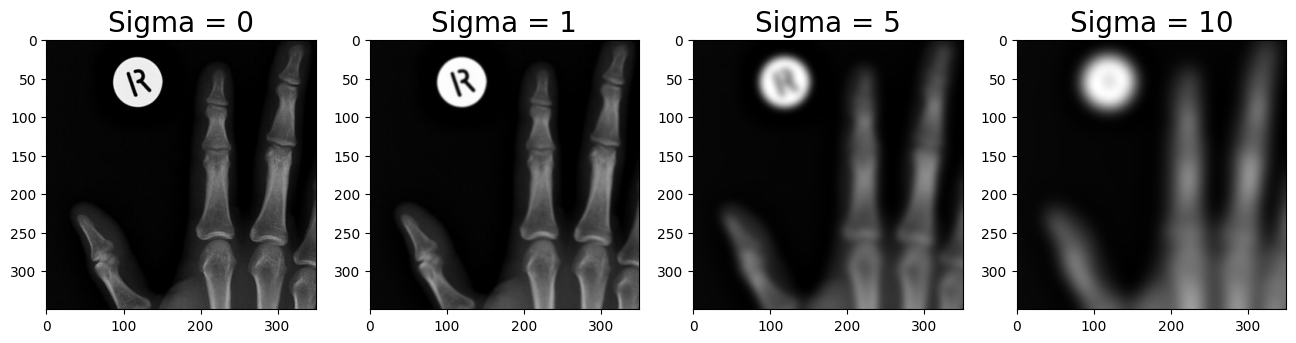

In [10]:
from skimage.filters import gaussian

xray_crop = xray[50:400, 50:400]

fig, ax = plt.subplots(1, 4, figsize=(16, 4))

for i, sigma in enumerate([0, 1, 5, 10]):
    xray_gaussian = gaussian(xray_crop, sigma=sigma)
    ax[i].imshow(xray_gaussian, cmap="gray")
    ax[i].set_title(f"Sigma = {sigma}", fontsize=20)

plt.show()


### Exercise 3

Now, let's try to implement a convolutional filter by ourselves.

For example, let's use the following kernel:

$\begin{bmatrix}7 & 5 & 3 & 1 & 0\\ 5 & 3 & 1 & 0 & -1 \\ 3 & 1 & 0 & -1 & -3 \\ 1 & 0 & -1 & -3 & -5 \\ 0 & -1 & -3 & -5 & -7\end{bmatrix}$


Remember to convert the image to float before applying the convolution.

**What happens if you do not? Why do you think that is?**


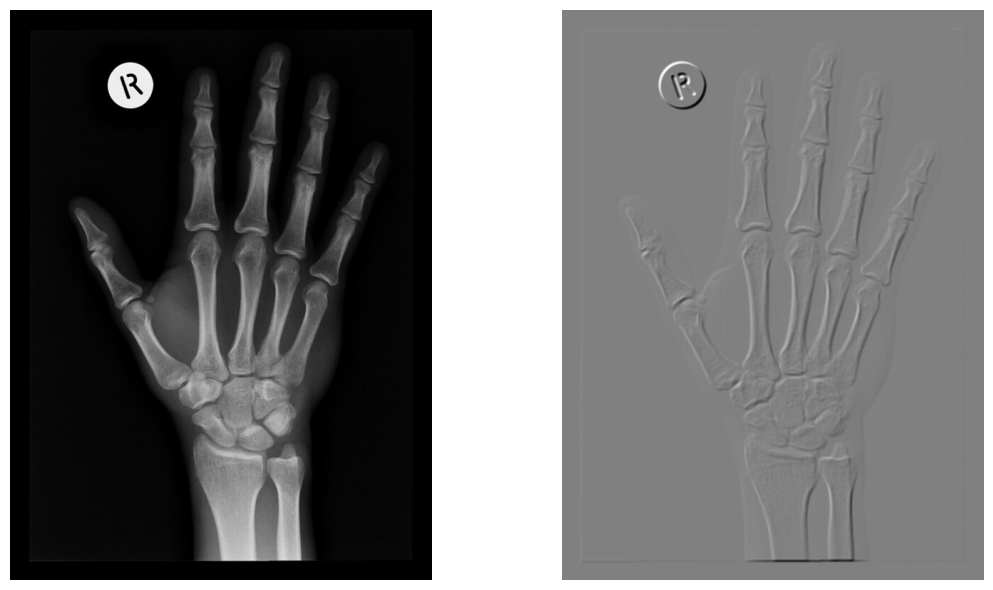

In [13]:
from skimage.filters.edges import convolve
from skimage import img_as_float

kernel = np.array([[7, 5, 3, 1, 0], 
                   [5, 3, 1, 0, -1], 
                   [3, 1, 0, -1, -3], 
                   [1, 0, -1, -3, -5], 
                   [0, -1, -3, -5, -7]])

xray_flt = img_as_float(xray)
fig, ax = plt.subplots(1, 2, figsize=(12,6))

ax[0].imshow(xray, cmap="gray")
ax[1].imshow(convolve(xray_flt, kernel), cmap="gray")
ax[0].axis("off")
ax[1].axis("off")

plt.tight_layout()

### Exercise 4

In Lecture 4 we talked about unsharp masking.

This is the process of sharpening an image by adding the difference between the original image and a blurred version of the image to the image itself.

Try writing your own unsharp masking function, `my_unsharp_mask(img, sigma, alpha)`. 

It should accept an image, a radius (the σ of the gaussian blur) and an amount for sharpening and return the sharpened image.

Compare the results with the `skimage.filters.unsharp_mask` function.


<details>
    <summary style="cursor: pointer;">Click here to reveal a hint.</summary>
    This will be tricky to work on 8-bit images. Start by converting the image to float, and make sure that you clip any value that is too large or too small at the end of the processing.
</details>

Image credits:

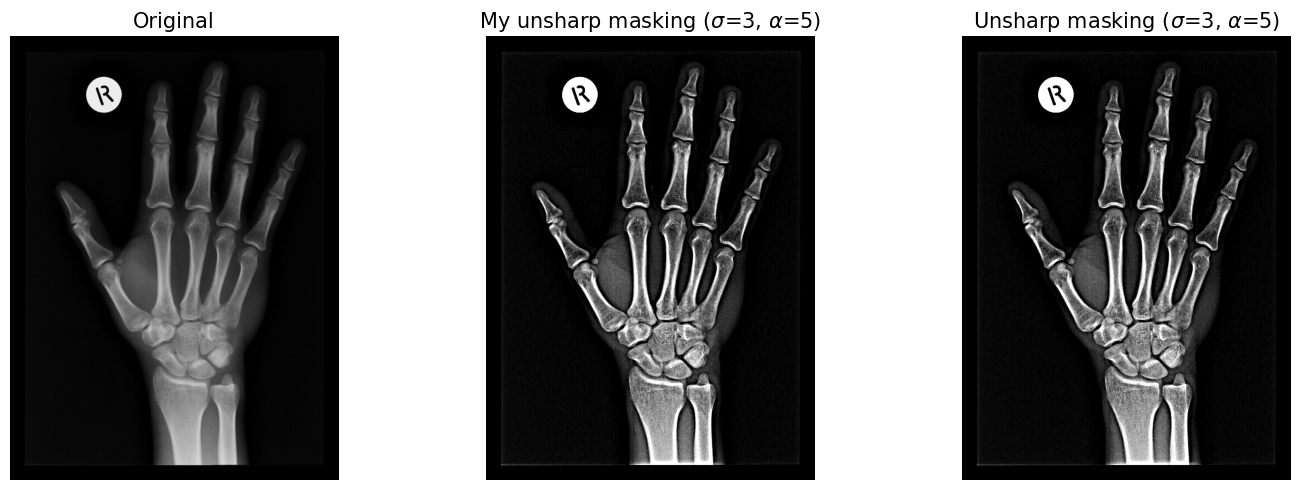

In [14]:
from skimage.filters import gaussian, unsharp_mask

def my_unsharp_mask(img, sigma, alpha):
    """
    Sharpens an image using unsharp masking

    Parameters
    ----------
    img : Image to be sharpened
    sigma : Sigma of Gaussian filter
    alpha : Amount of sharpening
    
    Returns
    -------
    The sharpened image
    """    
    img_fl = img_as_float(img)
    img_blurred = gaussian(img_fl, sigma=sigma)
    details = img_fl - img_blurred
    unsharp_image = img_fl + alpha * details
    unsharp_image = np.clip(unsharp_image, 0, 1)

    return unsharp_image

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sigma = 5
alpha = 3

ax[0].imshow(xray, cmap="gray")
ax[0].set_title("Original", fontsize=15)
ax[1].imshow(my_unsharp_mask(xray, sigma=sigma, alpha=alpha), cmap="gray")
ax[1].set_title("My unsharp masking ($\\sigma$=3, $\\alpha$=5)", fontsize=15)
ax[2].imshow(unsharp_mask(xray, radius=sigma, amount=alpha), cmap="gray")
ax[2].set_title("Unsharp masking ($\\sigma$=3, $\\alpha$=5)", fontsize=15)

for a in ax:
    a.axis("off")

plt.tight_layout()

### Removing noise

We saw how some filters, such as the median filter and the Gaussian filter, can be used to remove noise. Let's create a couple of noisy versions of our xray image and apply the median and gaussian filter to them.

We will add some "salt and pepper noise" to one version (that is, very bright and very dark pixels) and some Gaussian noise to the other.  

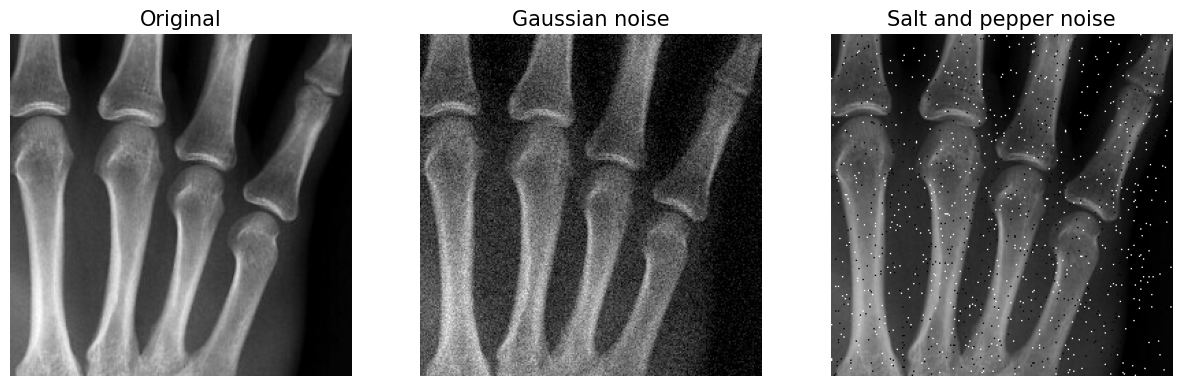

In [15]:
# Add normally distributed noise with mean 0 and standard deviation 0.1
xray_gaus_noise = xray + np.random.normal(0, 15, size=xray.shape)
# Important to convert to unsigned integer otherwise this would have a float dtype, but with values between 0.0 and 255.0, which will cause a lot of trouble afterwards!
xray_gaus_noise = np.clip(xray_gaus_noise, 0, 255).astype(np.uint8)
xray_gaus_noise = img_as_ubyte(xray_gaus_noise)
# For the salt and pepper noise, select a random number of pixels and set them to either 0 or 255
n_points = 10000

pos_x = np.random.choice(range(xray.shape[0]), n_points)
pos_y = np.random.choice(range(xray.shape[1]), n_points)

xray_salt_pepper = xray.copy()
for px, py in zip(pos_x, pos_y):
    xray_salt_pepper[px, py] = np.random.choice([0, 255])

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(xray[250:500, 250:500], cmap="gray")
ax[0].set_title("Original", fontsize=15)
ax[1].imshow(xray_gaus_noise[250:500, 250:500], cmap="gray")
ax[1].set_title("Gaussian noise", fontsize=15)
ax[2].imshow(xray_salt_pepper[250:500, 250:500], cmap="gray")
ax[2].set_title("Salt and pepper noise", fontsize=15)

for a in ax:
    a.axis("off")

plt.show()

### Exercise 5

Apply the mean (or box) filter, the median filter and the gaussian filter to the noisy images and compare them to the original. What is the effect of the various methods? Does the type of noise make a difference?

*Note*: it might be easier to only plot a crop of the image to compare the results more easily.

<details>
    <summary style="cursor: pointer;">Click here to reveal a hint.</summary>
    Use the <code>skimage.filters.rank.mean</code>, and <code>skimage.filters.median</code> and <code>skimage.filters.gaussian</code> functions.
</details>


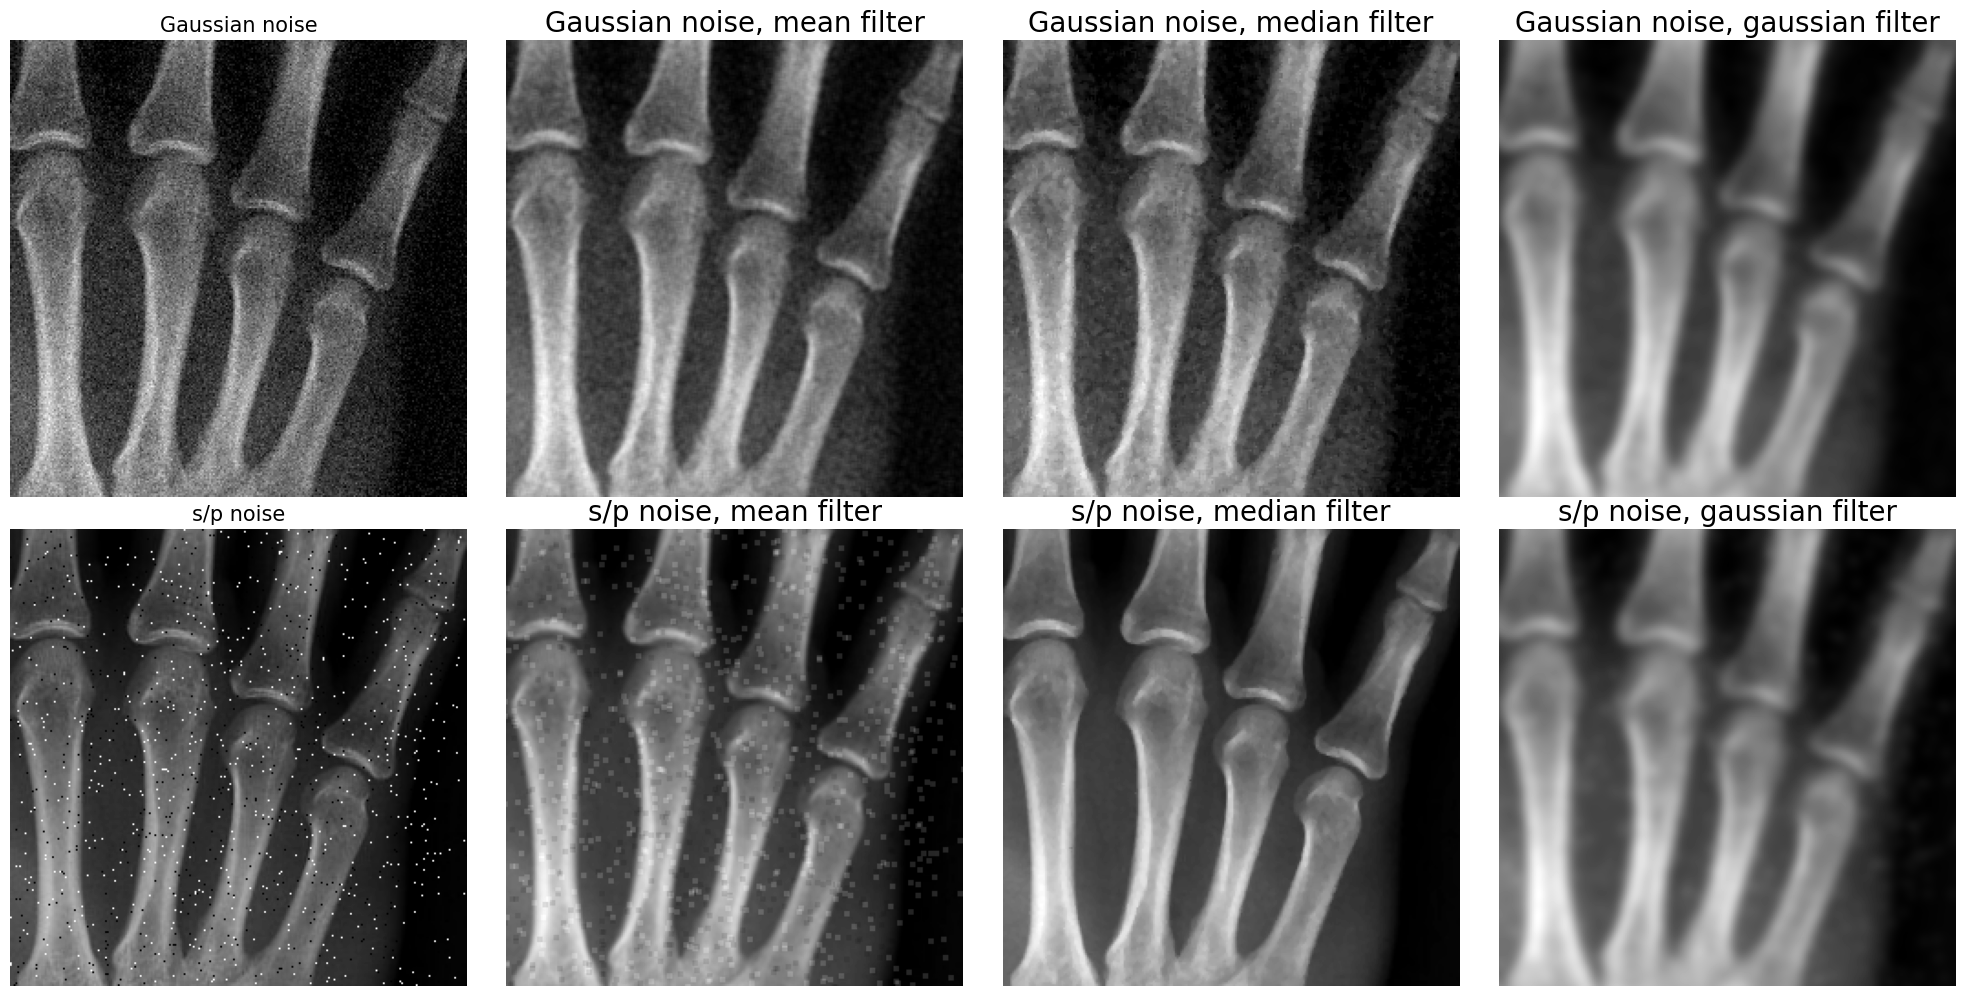

In [17]:
from skimage.filters import gaussian, median
from skimage.filters.rank import mean

xray_gaus_noise_mean = mean(xray_gaus_noise, footprint = np.ones((3, 3)))
xray_gaus_noise_med = median(xray_gaus_noise)
xray_gaus_noise_gaus = gaussian(xray_gaus_noise, sigma=3)

xray_salt_pepper_mean = mean(xray_salt_pepper, footprint = np.ones((3, 3)))
xray_salt_pepper_med = median(xray_salt_pepper)
xray_salt_pepper_gaus = gaussian(xray_salt_pepper, sigma=3)

fig, ax = plt.subplots(2, 4, figsize=(20, 10))
ax[0,0].imshow(xray_gaus_noise[250:500, 250:500], cmap="gray")
ax[0,0].set_title("Gaussian noise", fontsize=15)
ax[0,1].imshow(xray_gaus_noise_mean[250:500, 250:500], cmap="gray")
ax[0,1].set_title("Gaussian noise, mean filter", fontsize=20)
ax[0,2].imshow(xray_gaus_noise_med[250:500, 250:500], cmap="gray")
ax[0,2].set_title("Gaussian noise, median filter", fontsize=20)
ax[0,3].imshow(xray_gaus_noise_gaus[250:500, 250:500], cmap="gray")
ax[0,3].set_title("Gaussian noise, gaussian filter", fontsize=20)

ax[1,0].imshow(xray_salt_pepper[250:500, 250:500], cmap="gray")
ax[1,0].set_title("s/p noise", fontsize=15)
ax[1,1].imshow(xray_salt_pepper_mean[250:500, 250:500], cmap="gray")
ax[1,1].set_title("s/p noise, mean filter", fontsize=20)
ax[1,2].imshow(xray_salt_pepper_med[250:500, 250:500], cmap="gray")
ax[1,2].set_title("s/p noise, median filter", fontsize=20)
ax[1,3].imshow(xray_salt_pepper_gaus[250:500, 250:500], cmap="gray")
ax[1,3].set_title("s/p noise, gaussian filter", fontsize=20)

for a in ax.flat:
    a.axis("off")

plt.tight_layout()

### Answer

Mean and median filter work OK on the Gaussian noise, although they do not fully remove noise. Gaussian noise removes noise better but blurs the image.
For salt and pepper noise, the median filter removes the noise better, while the mean filter makes the speckles bigger, although less intense. The Gaussian filter blurs the image too much.

### The end!

Congratulations! You made it to the end of this workshop!
Please remember to discuss your solutions on the Slack channel!